In [24]:
import pandas as pd

In [25]:
df= pd.read_csv('../data/USC00442208_19000101-20240122.csv')

In [26]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44987 entries, 0 to 44986
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  44987 non-null  object 
 1   NAME     44987 non-null  object 
 2   DATE     44987 non-null  object 
 3   DAPR     9 non-null      float64
 4   MDPR     9 non-null      float64
 5   PRCP     44847 non-null  float64
 6   SNOW     42839 non-null  float64
 7   SNWD     39628 non-null  float64
 8   TMAX     44855 non-null  float64
 9   TMIN     44801 non-null  float64
 10  TOBS     44373 non-null  float64
 11  WESD     2440 non-null   float64
dtypes: float64(9), object(3)
memory usage: 4.1+ MB


In [27]:
df['DATE']=pd.to_datetime(df['DATE'])
df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
0,USC00442208,"DALE ENTERPRISE, VA US",1900-01-01,NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1,USC00442208,"DALE ENTERPRISE, VA US",1900-01-02,NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
2,USC00442208,"DALE ENTERPRISE, VA US",1900-01-03,NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
3,USC00442208,"DALE ENTERPRISE, VA US",1900-01-04,NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
4,USC00442208,"DALE ENTERPRISE, VA US",1900-01-05,NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN


In [30]:
df=df.set_index('DATE')
df.head()

,STATION,NAME,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,,,
1900-01-01,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1900-01-02,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
1900-01-03,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
1900-01-04,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
1900-01-05,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN


<AxesSubplot:xlabel='DATE'>

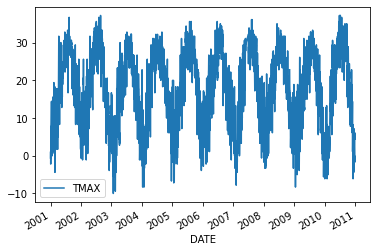

In [38]:
df.loc["2001":"2010"].plot(y='TMAX')

In [39]:
df.describe()

,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
count,9.000000,9.000000,44847.000000,42839.000000,39628.000000,44855.000000,44801.000000,44373.000000,2440.000000
mean,2.777778,11.844444,2.565030,1.822522,6.303144,18.604945,5.255697,12.592921,5.368402
std,1.641476,10.479040,7.195768,15.379604,33.223893,9.941317,9.131053,9.923029,36.966610
min,2.000000,0.000000,0.000000,0.000000,0.000000,-13.300000,-31.700000,-51.100000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,10.600000,-1.700000,4.400000,0.000000
50%,2.000000,11.400000,0.000000,0.000000,0.000000,20.000000,5.600000,13.300000,0.000000
75%,3.000000,19.800000,1.300000,0.000000,0.000000,27.200000,13.300000,21.100000,0.000000
max,7.000000,29.700000,254.000000,610.000000,762.000000,40.600000,32.200000,38.300000,635.000000


In [43]:
df_monthly = df.resample('M').mean()

<AxesSubplot:xlabel='month'>

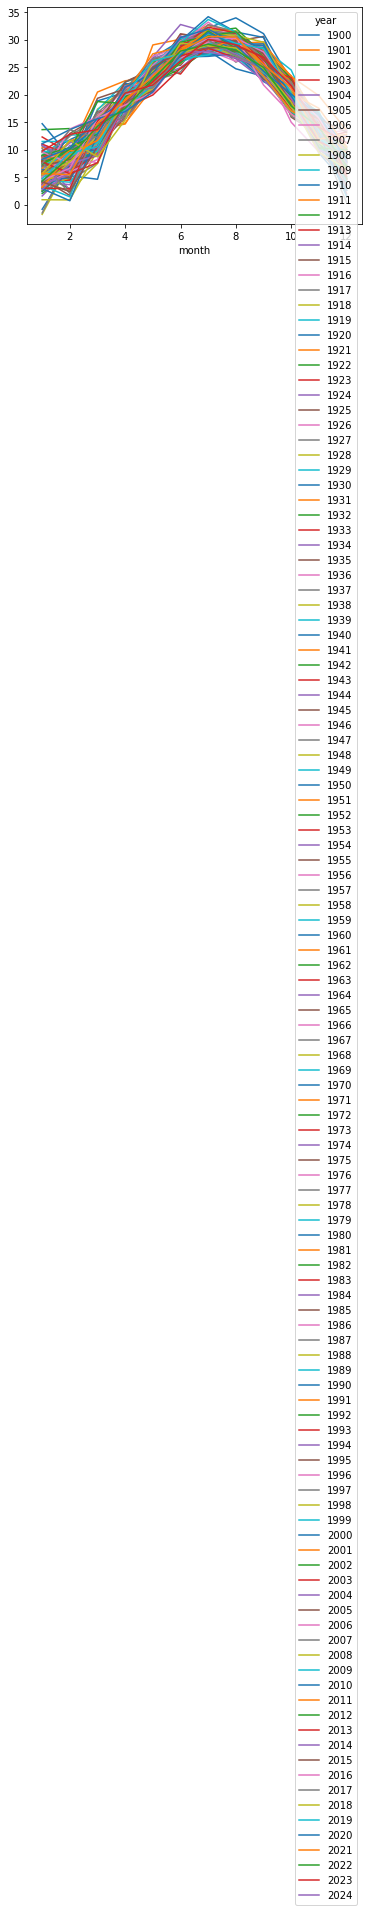

In [61]:
df_monthly['month']=df_monthly.index.month
df_monthly['year']=df_monthly.index.year
pd.pivot_table(df_monthly, values='TMAX', index=['year'],
                       columns=['month'], aggfunc="mean").T.plot()